
# Linear Regression Project

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!


## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [58]:
customer_01=pd.read_excel('F:/ostad/data science/Assignment 13/Assignment/Ecommerce Customers.xlsx',sheet_name='Ecommerce Customer 1')

In [59]:
customer_02=pd.read_excel('F:/ostad/data science/Assignment 13/Assignment/Ecommerce Customers.xlsx',sheet_name='Ecommerce Customer 2')

In [60]:
customer_01.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [61]:
customer_02.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,awu@robinson.org,"0281 Dale Wells Suite 656\nEast Joshua, ME 73389",Brown,32.054262,13.149670,37.650400,4.195614,561.874658
1,xevans@hotmail.com,"13164 Miller Camp\nSouth Deannaberg, ID 85433",DarkMagenta,33.228772,12.685394,36.048986,2.139403,444.576144
2,lauriewilson@jackson.com,"389 Joshua Stravenue Apt. 983\nMartinezland, M...",Cornsilk,32.077590,10.347877,39.045156,3.434560,401.033135
3,cruiz@yahoo.com,"497 Julian Brook Suite 872\nHillberg, FM 87927...",LightSalmon,33.981006,9.316289,36.914952,2.868428,384.326057
4,tammy12@gmail.com,"78297 Brown Street Apt. 786\nEast Taylorfurt, ...",Chocolate,34.179518,12.581548,35.444265,3.137069,527.782996


# Join and Clean the data

In [62]:
# Joining Data
merged_data=pd.concat([customer_01, customer_02], ignore_index=True)

**Check the head of customers, and check out its info() and describe() methods.**

In [63]:
# Checking Head of Customers
merged_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [64]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   492 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       492 non-null    float64
 6   Length of Membership  487 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [65]:
merged_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,492.000000,500.000000,492.000000,487.000000,500.000000
mean,33.041678,12.052488,37.057283,3.536244,499.314038
std,0.988162,0.994216,1.013438,0.990532,79.314782
min,29.532429,8.508152,33.913847,0.789520,256.670582
25%,32.338172,11.388153,36.349257,2.933598,445.038277
50%,33.077133,11.983231,37.065856,3.532862,498.887875
75%,33.708778,12.753850,37.697353,4.127420,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [66]:
# Checking any duplicate values
merged_data[merged_data.duplicated()]

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


In [67]:
# Checking any missing values
merged_data.isnull().sum().sort_values(ascending=False)

Length of Membership    13
Time on Website          8
Avg. Session Length      8
Yearly Amount Spent      0
Time on App              0
Avatar                   0
Address                  0
Email                    0
dtype: int64

In [ ]:
# From the above information, we observed that three columns have missing values: 'Length of Membership', 'Time on Website', 'Avg. Session Length'.

3.536244103701507
3.53286157955647
0.9905324966829449


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length of Membership', ylabel='Density'>

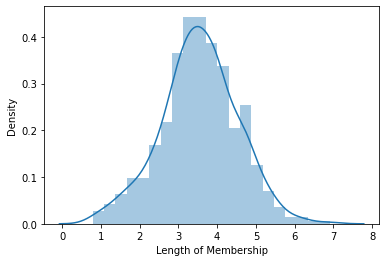

In [68]:

# To deal with missing values, checking central tendency of the 'Length of Membership' column.
print(merged_data['Length of Membership'].mean())
print(merged_data['Length of Membership'].median())
print(merged_data['Length of Membership'].std())
sns.distplot(merged_data['Length of Membership'])

37.05728330939125
37.0658555834923
1.0134383248844936


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time on Website', ylabel='Density'>

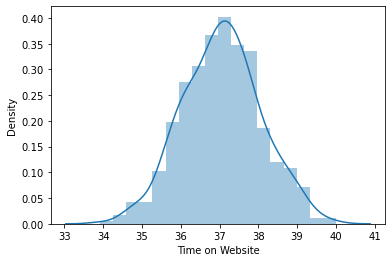

In [69]:
# To deal with missing values, checking central tendency of the 'Time on Website' column.
print(merged_data['Time on Website'].mean())
print(merged_data['Time on Website'].median())
print(merged_data['Time on Website'].std())
sns.distplot(merged_data['Time on Website'])

33.04167794404197
33.07713320079975
0.9881624004850837


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg. Session Length', ylabel='Density'>

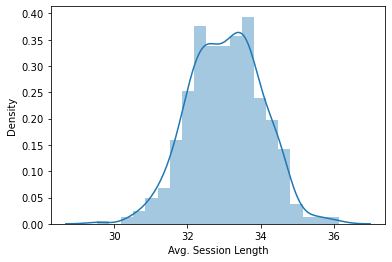

In [70]:
# To deal with missing values, checking central tendency of the 'Avg. Session Length' column.
print(merged_data['Avg. Session Length'].mean())
print(merged_data['Avg. Session Length'].median())
print(merged_data['Avg. Session Length'].std())
sns.distplot(merged_data['Avg. Session Length'])

In [ ]:
# By analyzing the above mean, median and distribution plot, we have taken a decision.
# The decision is to fill the missing values by mean concerning 'Length of Membership', 'Time on Website', 'Avg. Session Length' columns.

In [71]:
mean_value=merged_data['Length of Membership'].mean()
  
merged_data['Length of Membership'].fillna(value=mean_value, inplace=True)

In [72]:
mean_value2=merged_data['Time on Website'].mean()
  
merged_data['Time on Website'].fillna(value=mean_value2, inplace=True)

In [73]:
mean_value3=merged_data['Avg. Session Length'].mean()
  
merged_data['Avg. Session Length'].fillna(value=mean_value3, inplace=True)

In [74]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
# Now the data set has no missing value.

## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

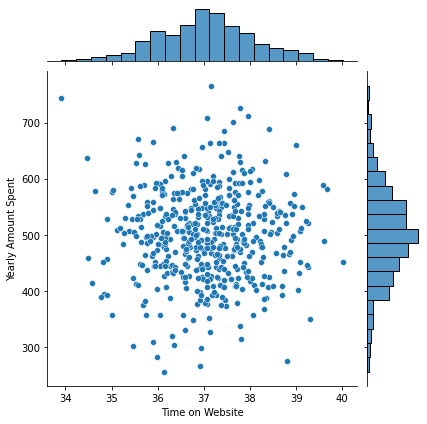

In [75]:
# Creating a jointplot to compare the "Time on Website" and "Yearly Amount Spent"
sns.jointplot(data=merged_data, x="Time on Website", y="Yearly Amount Spent")

In [76]:
# Checking any correlation in the data set.
merged_data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027306,-0.038753,0.042632,0.347553
Time on App,-0.027306,1.000000,0.092069,0.033277,0.499328
Time on Website,-0.038753,0.092069,1.000000,-0.040018,0.001173
Length of Membership,0.042632,0.033277,-0.040018,1.000000,0.789146
Yearly Amount Spent,0.347553,0.499328,0.001173,0.789146,1.000000


<AxesSubplot:>

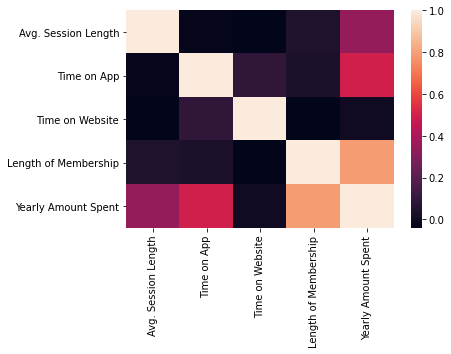

In [77]:
# Checking Heatmap
sns.heatmap(merged_data.corr())

# From the above jointplot and the correlation value of 0.001173 we can infer that there is no significant correlation between "Time on Website" and "Yearly Amount Spent".

** Do the same but with the Time on App column instead. **

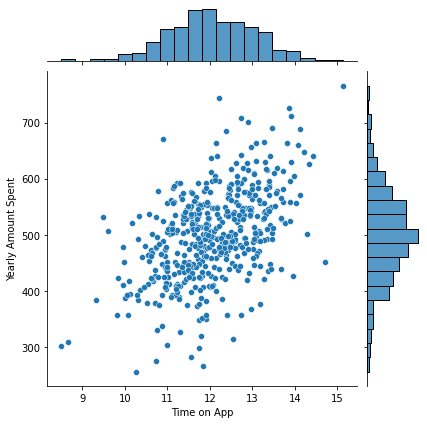

In [78]:
# Creating a jointplot to compare the "Time on App" and "Yearly Amount Spent"
sns.jointplot(data=merged_data, x="Time on App", y="Yearly Amount Spent")

# From the above jointplot and the correlation value of 0.499328, we can infer that there is a moderate correlation between "Time on App" and "Yearly Amount Spent".

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

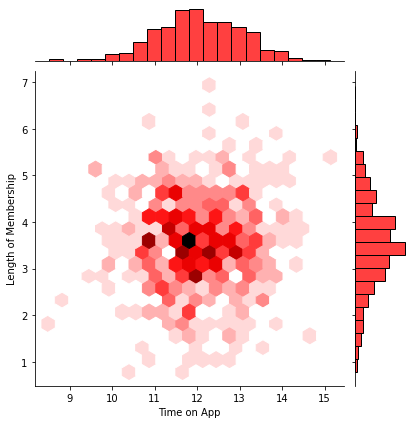

In [79]:
# Creating a 2D hex bin plot comparing "Time on App" and "Length of Membership"
fig=sns.jointplot(x='Time on App', y='Length of Membership', kind="hex", color="red", data=merged_data)
plt.show()

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

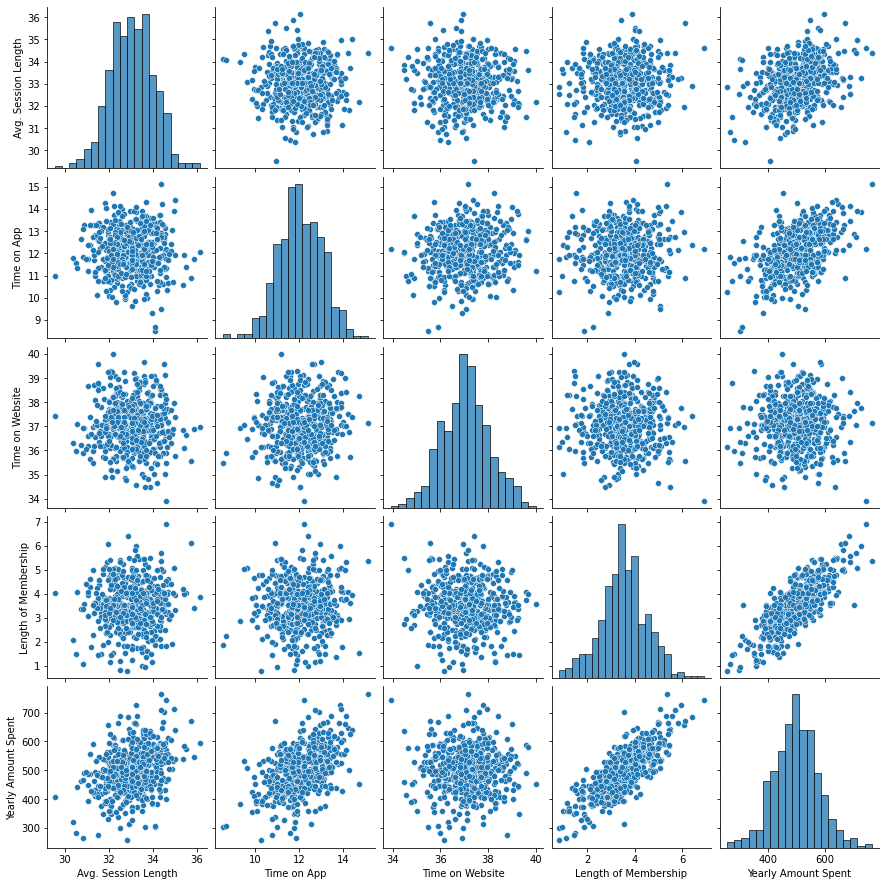

In [80]:
# Creating pairplot
sns.pairplot(merged_data)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

# From the above plot we can infer that "Length of Membership" has the most correlated feature with "Yearly Amount Spent".

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

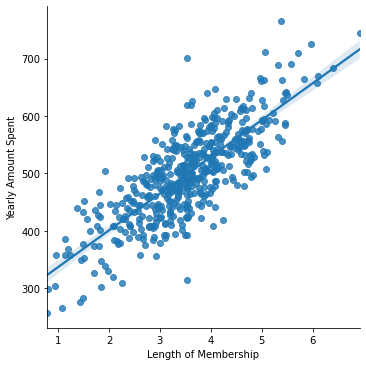

In [81]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=merged_data)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [82]:
merged_data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [83]:
X = merged_data[['Length of Membership', 'Time on App','Time on Website','Avg. Session Length']]
y = merged_data['Yearly Amount Spent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [85]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [86]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [87]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [88]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Length of Membership,61.207183
Time on App,38.034643
Time on Website,-0.832499
Avg. Session Length,26.633060


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [89]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

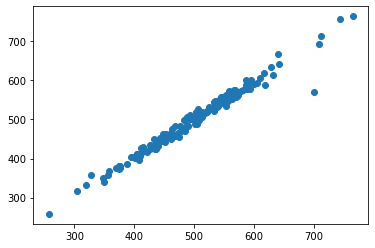

In [90]:
plt.scatter(y_test,predictions)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [97]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:',mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Median absolute error:', metrics.median_absolute_error(y_test, predictions))
print('Mean squared log error:', metrics.mean_squared_log_error(y_test, predictions))

print('R2:', metrics.r2_score(y_test, predictions))
print('Variance score: {}'.format(lm.score(X_test, y_test)))


MAE: 8.534653904747467
MSE: 208.4640889614084
RMSE: 14.438285527077252
Median absolute error: 7.356378828058496
Mean squared log error: 0.00069063475630439
R2: 0.9712811269249392
Variance score: 0.9712811269249392


# R-squared of 97% reveals that 97% of the variability observed in the target variable is explained by the regression model. In general, this higher R-squared value means that the model fits the data well. 

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


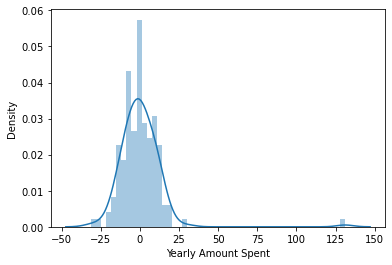

In [93]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
# From the above histogram of the residuals we infer that the distribution is normal. 

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [94]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Length of Membership,61.207183
Time on App,38.034643
Time on Website,-0.832499
Avg. Session Length,26.633060


** How can you interpret these coefficients? **

** Interpreting the coefficients:

* Holding all other features fixed, a 1 unit increase in "Length of Membership" is associated with an "increase of 61.20 unit of "Yearly Amount Spent".
* Holding all other features fixed, a 1 unit increase in "Time on App" is associated with an "increase of 38.03 unit of "Yearly Amount Spent".
* Holding all other features fixed, a 1 unit increase in "Time on Website" is associated with a "decrease of 0.83 unit of "Yearly Amount Spent".
* Holding all other features fixed, a 1 unit increase in "Avg. Session Length" is associated with an "increase of 26.63 unit of "Yearly Amount Spent".


# The greater coefficient (61.20) of "Length of Membership" than all other infers that it is really important. 

**Do you think the company should focus more on their mobile app or on their website?**

Yes, I think the company should focus more on their mobile app instead of website. The reason behind this is the greater coefficient (38.03) than that of website (-0.83).